In [ ]:
# combine several generated image layers into a single image
# order:
# - frame of the plot with x,y axes, ticks, labels, and title
# - hystogram plot                                         <- needs to be generated with its contour points as well
# - hystragram plot with bar names, values, and colors
# - curve line plot                                                 <- needs to be generated with its contour points as well
# - legends and texts for the curve line plot

# generate the first layer
import numpy as np
import time

# use cv2 instead of mpl so that we can track the coordinates of the text, ticks, labels, etc.
import cv2

x_axis_y: int
x_label: str
x_tick_count: int
x_ticks_min: float
x_ticks_step: float
y_axis_x: int
y_label: str
y_tick_count: int
y_ticks_min: float
y_ticks_step: float
has_y_tick: bool
frame_bottom: int
frame_left: int
frame_right: int
frame_top: int
frame_width: int



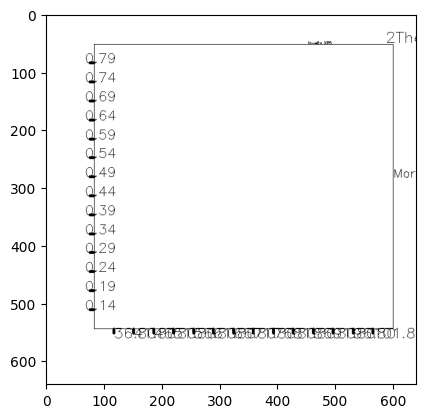

In [ ]:
# generate the first layer
def layer1(w, h, random_src: np.random.RandomState):

    global x_axis_y, x_label, x_tick_count, x_ticks_min, x_ticks_step, y_axis_x, y_label, y_tick_count, y_ticks_min, y_ticks_step, has_y_tick
    global frame_bottom, frame_left, frame_right, frame_top, frame_width

    plot_title_lists = [
        'Faraday Effeciency', 'FE(%)', 'Potential(V)', 'Current(mA)', 
        "Different Catalysts", "Raman Shift", "Intensity", "In-situ Raman",
        "XRD", "2Theta", "Intensity", "In-situ XRD",
        "XPS", "Binding Energy", "Intensity", "In-situ XPS",
        "SEM", "Morphology", "Size", "Binding Energy",
        ]

    plot_title = random_src.choice(plot_title_lists)
    x_label = random_src.choice(plot_title_lists)
    y_label = random_src.choice(plot_title_lists)

    x_ticks_step = random_src.choice([0.1, 0.5, 1, 5, 10, 50, 100, 200])
    x_ticks_min = random_src.uniform(0, 20) * x_ticks_step
    x_tick_count = random_src.randint(1, 6) * 5

    y_ticks_step = random_src.choice([0.01, 0.05, 0.1, 0.5, 1, 5,])
    y_ticks_min = random_src.uniform(0, 20) * y_ticks_step
    y_tick_count = random_src.randint(1, 6) * 5
    has_y_tick = random_src.choice([True, False])


    # create a white image
    img = np.ones((img_height, img_width, 3), np.uint8) * 255

    # draw the plot frame
    left,right,top,bottom = np.clip(random_src.normal(0.2, 0.1, 4), 0.1, 0.3)/2
    frame_left = int(img_width * left)
    frame_right = int(img_width * (1 - right))
    frame_top = int(img_height * top)
    frame_bottom = int(img_height * (1 - bottom))

    frame_width = random_src.randint(1, 2)
    cv2.rectangle(img, (frame_left, frame_top), (frame_right, frame_bottom), (0, 0, 0), frame_width)

    # draw the x,y axes
    x_axis_y = random_src.randint(frame_top, frame_bottom)
    y_axis_x = random_src.randint(frame_left, frame_right)
    axis_width = random_src.randint(2, 4)
    x_tick_length = random_src.randint(5, 10)
    y_tick_length = random_src.randint(5, 10)
    """cv2.line(img, (frame_left, x_axis_y), (frame_left + 5, x_axis_y), (0, 0, 0), axis_width)
    cv2.line(img, (y_axis_x, frame_bottom - 5), (y_axis_x, frame_bottom), (0, 0, 0), axis_width)"""

    for i in range(1, x_tick_count):
        x = frame_left + (frame_right - frame_left) * i / x_tick_count
        x = int(x)
        cv2.line(img, (x, frame_bottom), (x, frame_bottom + x_tick_length), (0, 0, 0), axis_width)

    if has_y_tick:
        for i in range(1, y_tick_count):
            y = frame_bottom - (frame_bottom - frame_top) * i / y_tick_count
            y = int(y)
            cv2.line(img, (frame_left - y_tick_length, y), (frame_left, y), (0, 0, 0), axis_width)

    # draw the x,y ticks
    x_tick_color = (0, 0, 0)
    y_tick_color = (0, 0, 0)
    x_tick_font = cv2.FONT_HERSHEY_SIMPLEX
    y_tick_font = cv2.FONT_HERSHEY_SIMPLEX
    x_tick_font_scale = random_src.uniform(0.1, 0.9)
    y_tick_font_scale = random_src.uniform(0.5, 0.9)
    x_tick_font_thickness = random_src.randint(1, 2)
    y_tick_font_thickness = random_src.randint(1, 2)

    """cv2.putText(img, f'{x_ticks_min:.2f}', (frame_left, x_axis_y + x_tick_length), x_tick_font, x_tick_font_scale, x_tick_color, x_tick_font_thickness)
    cv2.putText(img, f'{x_ticks_min + x_ticks_step * x_tick_count:.2f}', (frame_right, x_axis_y + x_tick_length), x_tick_font, x_tick_font_scale, x_tick_color, x_tick_font_thickness)

    if has_y_tick:
        cv2.putText(img, f'{y_ticks_min:.2f}', (y_axis_x - y_tick_length, frame_bottom), y_tick_font, y_tick_font_scale, y_tick_color, y_tick_font_thickness)
        cv2.putText(img, f'{y_ticks_min + y_ticks_step * y_tick_count:.2f}', (y_axis_x - y_tick_length, frame_top), y_tick_font, y_tick_font_scale, y_tick_color, y_tick_font_thickness)
"""
    for i in range(1, x_tick_count):
        x = frame_left + (frame_right - frame_left) * i / x_tick_count
        x = int(x)
        cv2.putText(img, f'{x_ticks_min + x_ticks_step * i:.2f}', (x, frame_bottom + x_tick_length * 2), x_tick_font, x_tick_font_scale, x_tick_color, x_tick_font_thickness)
        
    if has_y_tick:
        for i in range(1, y_tick_count):
            y = frame_bottom - (frame_bottom - frame_top) * i / y_tick_count
            y = int(y)
            cv2.putText(img, f'{y_ticks_min + y_ticks_step * i:.2f}', (frame_left - y_tick_length * 2, y), y_tick_font, y_tick_font_scale, y_tick_color, y_tick_font_thickness)

    # draw the x,y labels
    x_label_font = cv2.FONT_HERSHEY_SIMPLEX
    y_label_font = cv2.FONT_HERSHEY_SIMPLEX
    x_label_font_scale = random_src.uniform(0.1, 1)
    y_label_font_scale = random_src.uniform(0.1, 1)
    x_label_font_thickness = random_src.randint(1, 2)
    y_label_font_thickness = random_src.randint(1, 2)

    cv2.putText(img, x_label, (frame_right, x_axis_y + x_tick_length * 2), x_label_font, x_label_font_scale, x_tick_color, x_label_font_thickness)
    cv2.putText(img, y_label, (y_axis_x - y_tick_length * 2, frame_top), y_label_font, y_label_font_scale, y_tick_color, y_label_font_thickness)

    # draw the plot title
    title_font = cv2.FONT_HERSHEY_SIMPLEX
    title_font_scale = random_src.uniform(0.5, 1)
    title_font_thickness = random_src.randint(1, 2)
    title_x = random_src.randint(frame_left, frame_right)
    title_y = random_src.randint(frame_top - 20, frame_top)

    cv2.putText(img, plot_title, (title_x, title_y), title_font, title_font_scale, (0, 0, 0), title_font_thickness)

    # convert the image to ARGB, where the white background is transparent
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

    return img

img_width, img_height = 640, 640
#random_src = np.random.RandomState(0x5A5A5A5A)
random_src = np.random.RandomState(int(time.time()) % 0x7FFFFFFF)

# show the layer1
import matplotlib.pyplot as plt
img = layer1(img_width, img_height, random_src)
plt.imshow(img)

[0.1547, 0.4, 0.2141, 0.4, 0.2141, 0.9094, 0.1547, 0.9094]
[0.2969, 0.8891, 0.3563, 0.8891, 0.3563, 0.9094, 0.2969, 0.9094]
[0.4391, 0.8766, 0.4984, 0.8766, 0.4984, 0.9094, 0.4391, 0.9094]
[0.5813, 0.1516, 0.6406, 0.1516, 0.6406, 0.9094, 0.5813, 0.9094]
[0.7234, 0.8359, 0.7828, 0.8359, 0.7828, 0.9094, 0.7234, 0.9094]


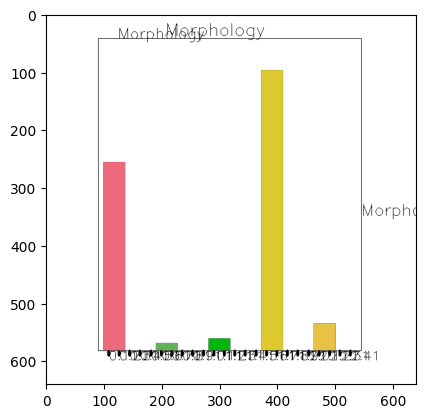

In [ ]:
# generate the second layer

frame_bottom: int
frame_left: int
frame_right: int
frame_top: int
frame_width: int

def layer2(img_width, img_height, random_src: np.random.RandomState):
    global frame_bottom, frame_left, frame_right, frame_top, frame_width
    transparent_img = np.zeros((img_height, img_width, 4), np.uint8)

    # draw the histogram plot
    histogram_count = random_src.randint(4,7)
    histo_pos = np.arange(histogram_count) / histogram_count
    histogram_colors = random_src.randint(0, 255, (histogram_count, 3))
    histogram_colors_argb = np.concatenate([histogram_colors, np.ones((histogram_count, 1), np.uint8) * 255], axis=1)

    histo_has_frame = random_src.choice([True, False])
    w = random_src.randint(30, 50)
    y = frame_bottom

    rects = [] # store the vertices of the rectangles

    for i in range(histogram_count):
        x = int((frame_right - frame_left) * (histo_pos[i] + 0.02)) + frame_left
        h = random_src.randint(10, frame_bottom - frame_top - 50)
        color = histogram_colors_argb[i]

        transparent_img[y-h:y, x:x+w] = color
        if histo_has_frame:
            cv2.rectangle(img, (x, y-h), (x+w, y), (0, 0, 0), 2)

        rect = [(x / img_width, (y-h) / img_height), # point 1
                      ((x+w) / img_width, (y-h) / img_height), # oint 2
                      ((x+w) / img_width, y / img_height), # point 3
                      (x / img_width, y / img_height)] # point 4
        
        rect = [round(x, 4) for point in rect for x in point] 
        print(rect)
        rects.append(rect)
                      


    return transparent_img, rects

    
# show the layer2
img1 = layer1(img_width, img_height, random_src)
img2, bar_labels = layer2(img_width, img_height, random_src)
plt.clf()
plt.imshow(img1)
plt.imshow(img2)



[90.0, 9.5619, 94.596, 17.041, 99.1919, 23.2831, 103.7879, 28.373, 108.3838, 32.3952, 112.9798, 35.4344, 117.5758, 37.5752, 122.1717, 38.9021, 126.7677, 39.5, 131.3636, 39.4533, 135.9596, 38.8468, 140.5556, 37.765, 145.1515, 36.2925, 149.7475, 34.514, 154.3434, 32.5142, 158.9394, 30.3776, 163.5354, 28.1888, 168.1313, 26.0326, 172.7273, 23.9935, 177.3232, 22.1562, 181.9192, 20.6052, 186.5152, 19.4252, 191.1111, 18.7009, 195.7071, 18.4886, 200.303, 18.7316, 204.899, 19.3448, 209.4949, 20.2433, 214.0909, 21.3421, 218.6869, 22.5562, 223.2828, 23.8006, 227.8788, 24.9903, 232.4747, 26.0404, 237.0707, 26.8657, 241.6667, 27.3813, 246.2626, 27.5178, 250.8586, 27.267, 255.4545, 26.6367, 260.0505, 25.6344, 264.6465, 24.2676, 269.2424, 22.5438, 273.8384, 20.4707, 278.4343, 18.0557, 283.0303, 15.3064, 287.6263, 12.2303, 292.2222, 8.835, 296.8182, 5.1486, 301.4141, 1.2812, 306.0101, -2.6367, 310.6061, -6.4743, 315.202, -10.1011, 319.798, -13.3864, 324.3939, -16.1995, 328.9899, -18.4099, 333.5859, -1

C:\Users\ybneh\AppData\Local\Temp\ipykernel_18616\3020936220.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  contour = np.concatenate([contour_below, contour_above[::-1]], axis=0).astype(np.float64)


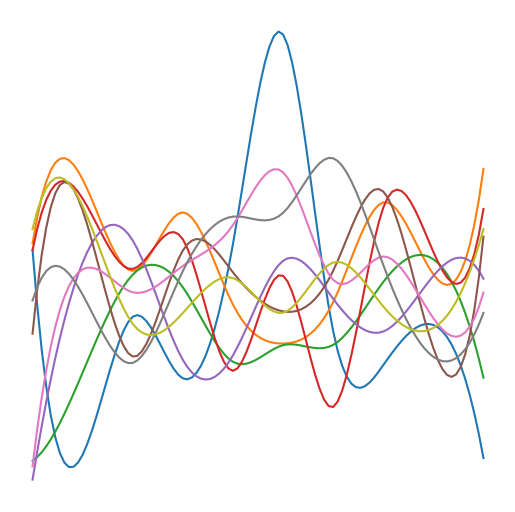

In [70]:
# generate the 3rd layer

# 3.1 we need to generate the curve line plot

def gen_line(random_src: np.random.RandomState, boundary_bottom, boundary_top, boundary_left, boundary_right, curve_shift:np.ndarray = None):
    if curve_shift is None:
        curve_shift = np.zeros(10)

    random_fourier = np.fft.fft(random_src.randn(10))
    random_sine = np.sin(np.linspace(0, 1000 * np.pi, 10)) * random_src.randn(10)
    random_curve = random_fourier + random_sine + curve_shift

    from scipy.interpolate import interp1d

    x = np.linspace(0, 1, 10)
    y = random_curve
    f = interp1d(x, y, kind='cubic')

    xnew = np.linspace(0, 1, 100)
    ynew = f(xnew)

    def restrict_to_bbox(x, y, bbox_b, bbox_t, bbox_l, bbox_r):
        x = (x - x.min()) / (x.max() - x.min()) * (bbox_r - bbox_l) + bbox_l
        y = (y - y.min()) / (y.max() - y.min()) * (bbox_t - bbox_b) + bbox_b
        return x, y

    def contour_curve(x, y, bbox_b, bbox_t, bbox_l, bbox_r, line_width):
        x, y = restrict_to_bbox(x, y, bbox_b, bbox_t, bbox_l, bbox_r)
        contour_below = np.vstack((x, y - line_width / 2)).T
        contour_above = np.vstack((x, y + line_width / 2)).T
        # contour_above = np.flip(contour_above, axis=0)
        contour = np.concatenate([contour_below, contour_above[::-1]], axis=0).astype(np.float64)
        # convert to the normalized coordinates with a format of (x1, y1, x2, y2, x3, y3, x4, y4, ...)
        contour = [round(x, 4) for point in contour for x in point]
        print(contour)
        return contour

    # test the contour_curve
    contour = contour_curve(xnew, ynew, boundary_bottom, boundary_top, boundary_left, boundary_right, 5)
    return xnew, ynew, contour

# 3.2 we need to generate several curves and then combine them into a single image

transparent_img = np.zeros((img_height, img_width, 4), np.uint8)

total_shift = random_src.normal(0, 0.1, 10) * 10
curve_count = random_src.randint(1, 10)

contours = []
plt.figure(figsize=(img_width/100, img_height/100), dpi=100)

for i in range(curve_count):
    figure_height = frame_bottom - frame_top
    bbox_top = frame_top + (i - 1) * figure_height / curve_count
    bbox_bottom = frame_top + i * figure_height / curve_count

    curve_gap = figure_height / curve_count
    x, y, contour = gen_line(random_src, bbox_bottom, bbox_top, frame_left, frame_right, total_shift * i / curve_count)

    layer_ = np.zeros((img_height, img_width, 4), np.uint8)
    plt.plot(x, y)
    plt.gca().set_axis_off()

    contours.append(contour)

plt.show()





[0.1625, 0.8391, 0.2156, 0.8391, 0.2156, 0.9344, 0.1625, 0.9344]
[0.3578, 0.4953, 0.4109, 0.4953, 0.4109, 0.9344, 0.3578, 0.9344]
[0.5516, 0.5813, 0.6047, 0.5813, 0.6047, 0.9344, 0.5516, 0.9344]
[0.7453, 0.6453, 0.7984, 0.6453, 0.7984, 0.9344, 0.7453, 0.9344]
generated 1000000 to auto_generated_images\1000000
[0.075, 0.7766, 0.1234, 0.7766, 0.1234, 0.8984, 0.075, 0.8984]
[0.2875, 0.8812, 0.3359, 0.8812, 0.3359, 0.8984, 0.2875, 0.8984]
[0.4984, 0.7141, 0.5469, 0.7141, 0.5469, 0.8984, 0.4984, 0.8984]
[0.7094, 0.3547, 0.7578, 0.3547, 0.7578, 0.8984, 0.7094, 0.8984]
generated 1000001 to auto_generated_images\1000001
[0.125, 0.7609, 0.1812, 0.7609, 0.1812, 0.9375, 0.125, 0.9375]
[0.2562, 0.6156, 0.3125, 0.6156, 0.3125, 0.9375, 0.2562, 0.9375]
[0.3859, 0.3844, 0.4422, 0.3844, 0.4422, 0.9375, 0.3859, 0.9375]
[0.5156, 0.6922, 0.5719, 0.6922, 0.5719, 0.9375, 0.5156, 0.9375]
[0.6453, 0.5922, 0.7016, 0.5922, 0.7016, 0.9375, 0.6453, 0.9375]
[0.775, 0.7766, 0.8313, 0.7766, 0.8313, 0.9375, 0.775, 0.

C:\Users\ybneh\AppData\Local\Temp\ipykernel_7552\2243154079.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(img_width/100, img_height/100), dpi=100)


<Figure size 640x480 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 640x640 with 0 Axes>

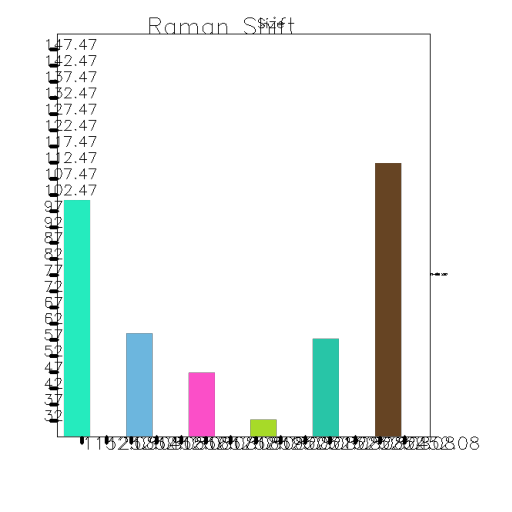

In [92]:
start_index = 10 ** 6
gen_count = 20
img_width, img_height = 640, 640
random_src = np.random.RandomState(0x5A5A5A5A)

import os
target_dir = 'auto_generated_images'
os.makedirs(target_dir, exist_ok=True)
for generating in np.arange(start_index, start_index + gen_count):
    img1 = layer1(img_width, img_height, random_src)
    img2, bar_labels = layer2(img_width, img_height, random_src)

    plt.clf()
    plt.figure(figsize=(img_width/100, img_height/100), dpi=100)
    plt.imshow(img1)
    plt.imshow(img2)
    plt.axis('off')
    
    os.makedirs(to, exist_ok=True)
    to = os.path.join(target_dir, f'{generating}')
    plt.savefig(f'{to}/origin.png', bbox_inches='tight', pad_inches=0)
    
    with open(f'{to}/yolo_seg.txt', 'w') as f:
        for bar_label in bar_labels:
            f.write('1 ' + ' '.join(map(lambda num: f"{num:.04f}", bar_label)) + '\n')
    print(f'generated {generating} to {to}')